# Лабораторая работа №2

## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Выполнил Попов Матвей

Группа М8О-408Б-20

Вариант 21


### Цель работы

Исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.


### Задание 1

Использовать линейную нейронную сеть с задержками для аппроксимации функции. В
качестве метода обучения использовать адаптацию.


Для начала зададим входные и выходные функции, соответствующие моему варианту

In [3]:
import numpy as np

def in1(t):
    return np.cos(-3*t**2 + 10*t - 5) - np.cos(t)

H1 = 0.01
T1 = (0.5, 4)

def in2(t):
    return np.cos(-3*t**2 + 5*t + 10)

H2 = 0.01
T2 = (0, 2.5)

def out(t):
    return 1 / 6 * np.cos(-3*t**2 + 5*t + 1.5 * np.pi)


Создадим словарь, в котором будем хранить веса, полученные от обучения модели в 
зависимости от глубины погружения временного ряда (от 1 до 5).

In [4]:
models = dict()

for i in range(1, 6):
    models[i] = None


Напишем функцию, которая будет создавать и обучать модель и принимать глубину 
погружения в качестве аргумента.

In [16]:
import tensorflow as tf
from tensorflow import keras

def get_model(delay):
    x = in1(np.linspace(T1[0], T1[1], int((T1[1] - T1[0])/H1)))
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = x[delay:]
    model = keras.Sequential()
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())
    train_results = model.fit(x_train, y_train, batch_size=1, epochs=5)
    return x_train, model, train_results


Получим 5 обученных моделей и результаты их обучения

In [17]:
for i in range(1, 6):
    models[i] = get_model(i)


Epoch 1/5
349/349 [==============================] - 1s 2ms/step - loss: 6.6994 - root_mean_squared_error: 2.5883
Epoch 2/5
349/349 [==============================] - 1s 2ms/step - loss: 5.5036 - root_mean_squared_error: 2.3460
Epoch 3/5
349/349 [==============================] - 1s 2ms/step - loss: 4.4844 - root_mean_squared_error: 2.1176
Epoch 4/5
349/349 [==============================] - 1s 1ms/step - loss: 3.6196 - root_mean_squared_error: 1.9025
Epoch 5/5
349/349 [==============================] - 1s 2ms/step - loss: 2.8774 - root_mean_squared_error: 1.6963
Epoch 1/5
348/348 [==============================] - 1s 1ms/step - loss: 0.3184 - root_mean_squared_error: 0.5642
Epoch 2/5
348/348 [==============================] - 0s 1ms/step - loss: 0.0597 - root_mean_squared_error: 0.2443
Epoch 3/5
348/348 [==============================] - 0s 1ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140
Epoch 4/5
348/348 [==============================] - 0s 1ms/step - loss: 0.0088 - root_m

Подготовим функции для визуализации результатов обучения

In [18]:
from matplotlib import pyplot as plt

def plot_loss_rmse(train_results):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    loss_history = train_results.history['loss']
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    loss_history = train_results.history['root_mean_squared_error']
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('RMSE')

    plt.show()

def plot_predict(x_train, model, delay):
    t = np.linspace(T1[0], T1[1], int((T1[1] - T1[0])/H1))
    x = in1(t)
    plt.plot(t[delay:], x[delay:], label='given')
    plt.plot(t[delay:], model.predict(x_train), label='predicted')
    plt.legend()
    plt.show()


### D = 1

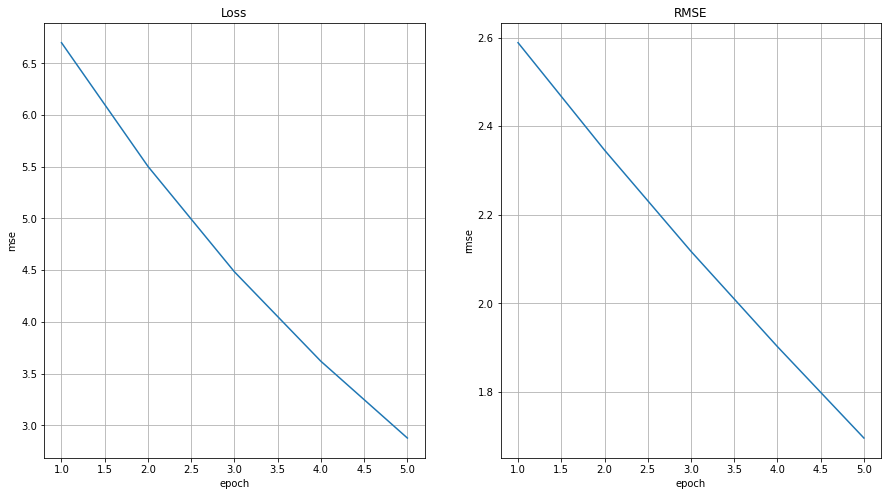

In [19]:
plot_loss_rmse(models[1][2])

11/11 [==============================] - 0s 926us/step


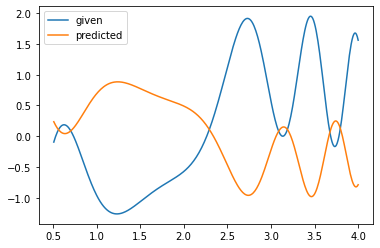

In [20]:
plot_predict(models[1][0], models[1][1], 1)

### D = 2

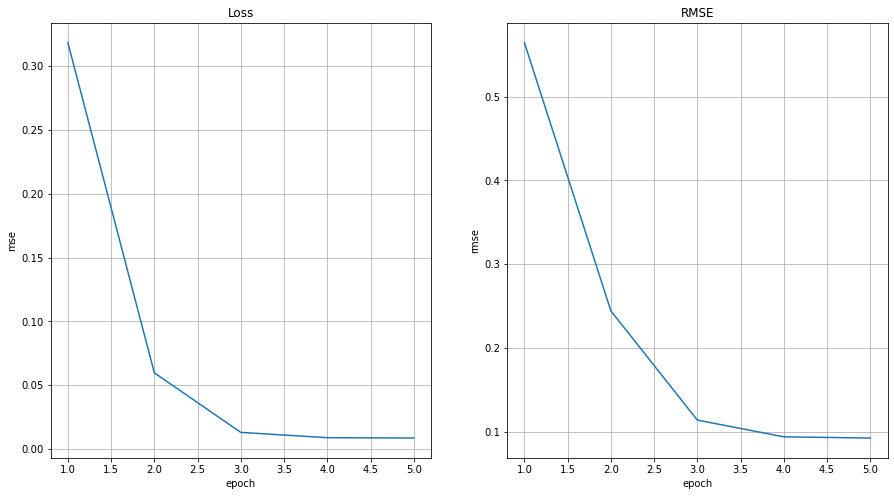

In [21]:
plot_loss_rmse(models[2][2])

11/11 [==============================] - 0s 1ms/step


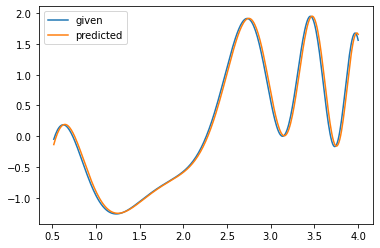

In [22]:
plot_predict(models[2][0], models[2][1], 2)

### D = 3

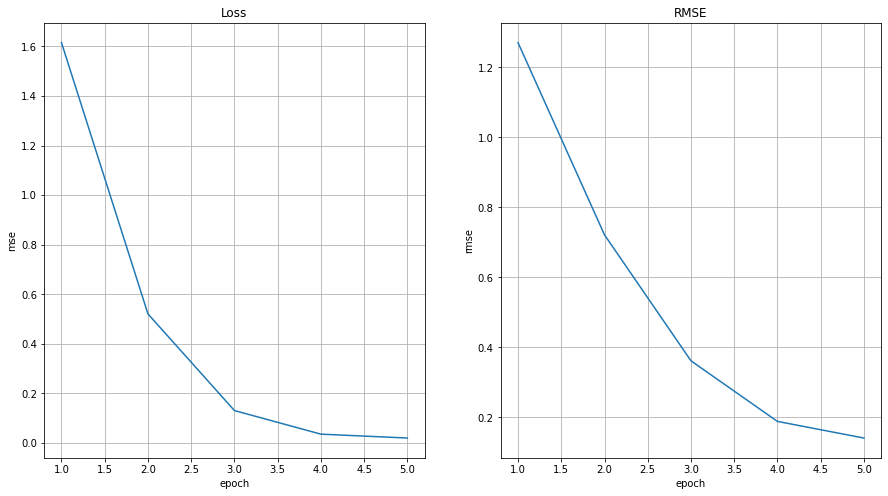

In [23]:
plot_loss_rmse(models[3][2])

11/11 [==============================] - 0s 917us/step


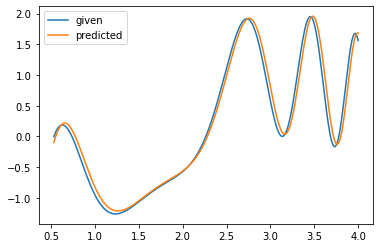

In [24]:
plot_predict(models[3][0], models[3][1], 3)

### D = 4

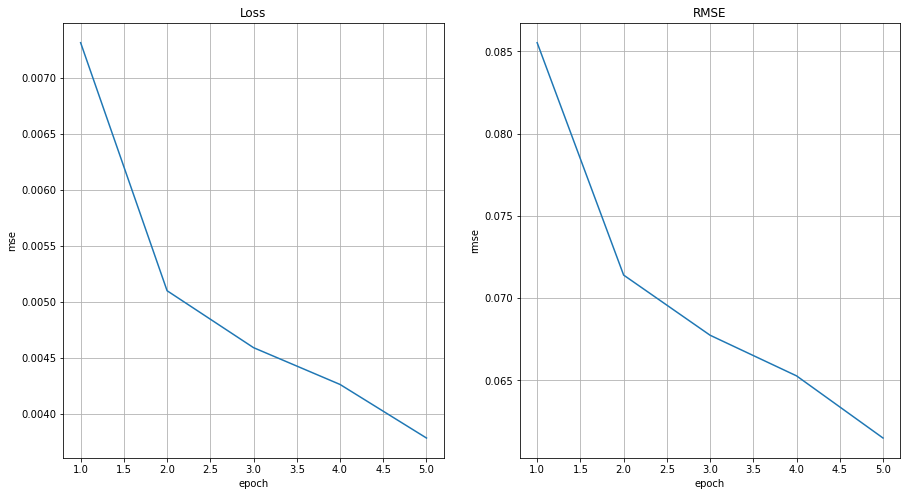

In [25]:
plot_loss_rmse(models[4][2])

11/11 [==============================] - 0s 1ms/step


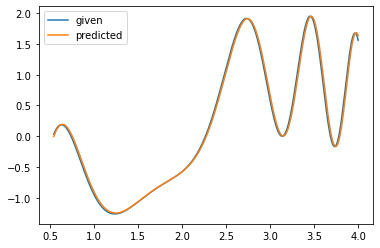

In [26]:
plot_predict(models[4][0], models[4][1], 4)

### D = 5

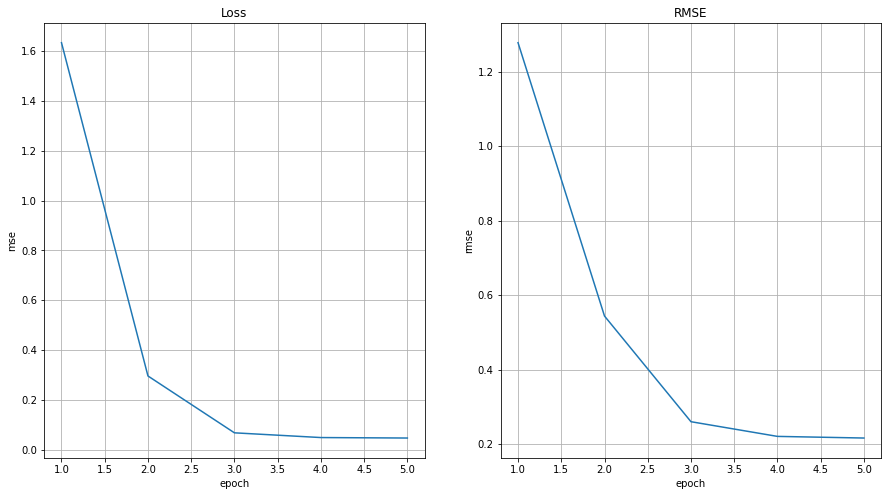

In [27]:
plot_loss_rmse(models[5][2])

11/11 [==============================] - 0s 1ms/step


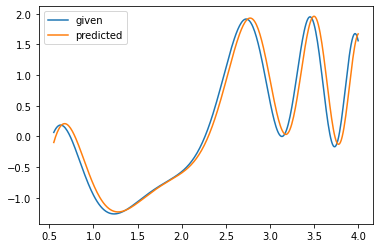

In [28]:
plot_predict(models[5][0], models[5][1], 5)

## Вывод

Проделав лабораторную работу, я обучил нескольько моделей предсказывать 
следующие значения последовательности. Я использовал различные глубины 
погружения и пришёл к выводу, что чем больше глубина, тем точнее предсказания и 
меньше показатели среднеквадратичной ошибки. Наилучших результатов получилось 
добиться при глубине 4.
